##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [7]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pose Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

## Preparation

Let's start with installing MediaPipe.


In [1]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 16.1 MB/s eta 0:00:00


Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [2]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

## Visualization utilities

In [3]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Download test image

To demonstrate the Pose Landmarker API, you can download a sample image using the follow code. The image is from [Pixabay](https://pixabay.com/photos/girl-woman-fitness-beautiful-smile-4051811/).

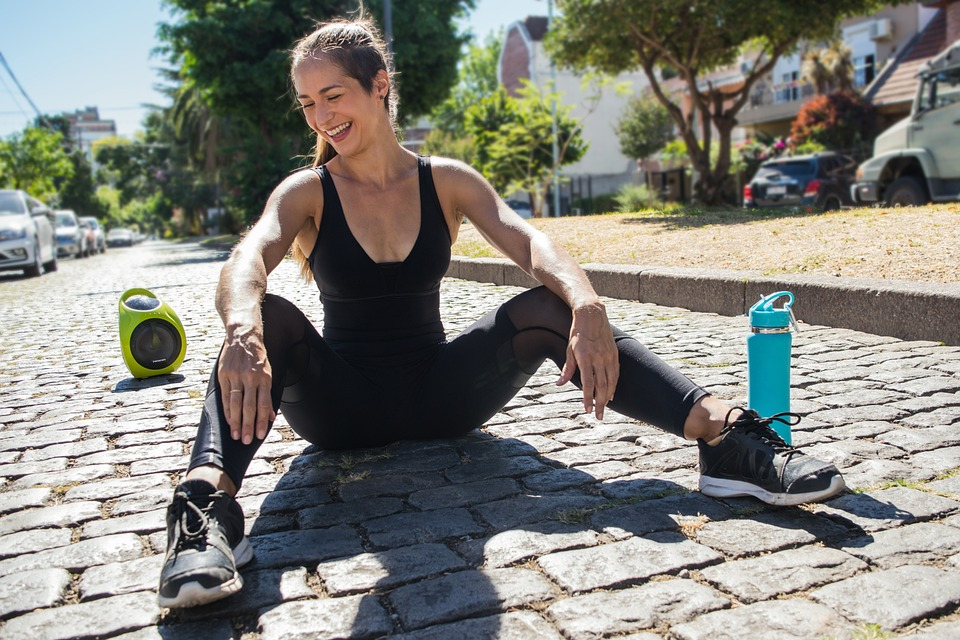

In [4]:
!wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) to learn more about configuration options that this solution supports.


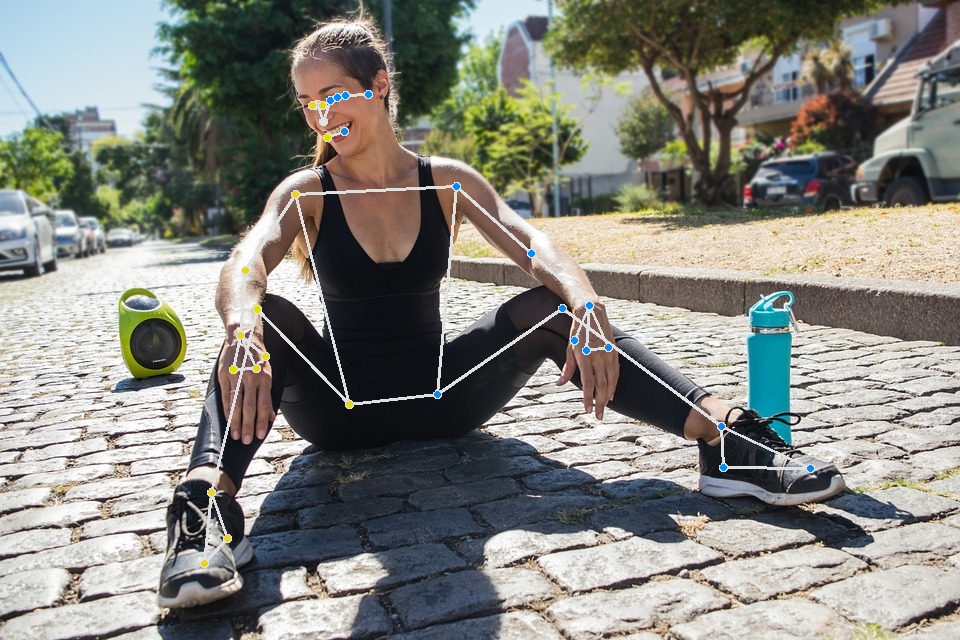

In [9]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

Visualize the pose segmentation mask.

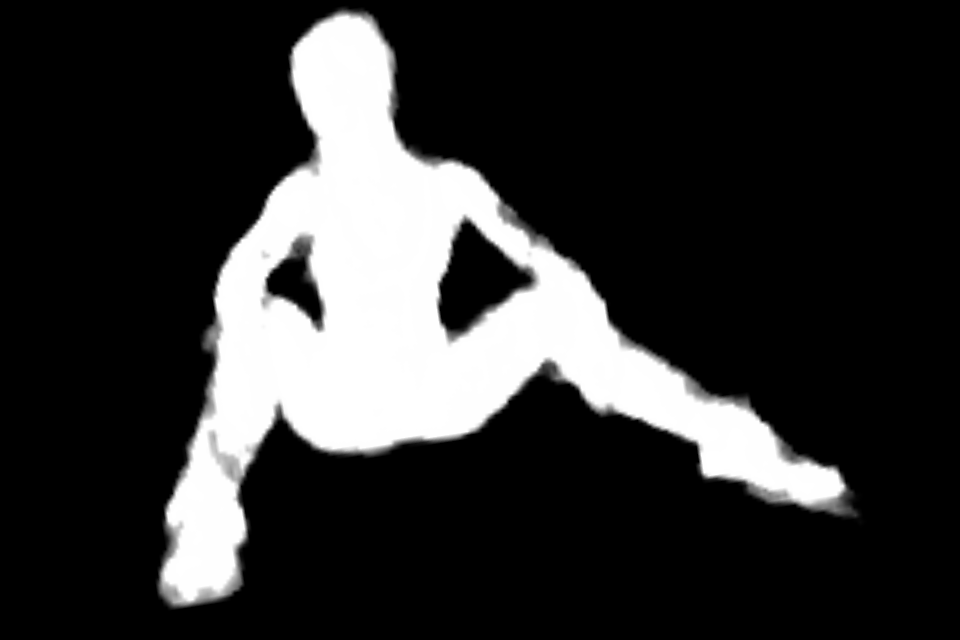

In [6]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
cv2_imshow(visualized_mask)

# Ejemplo Práctico #1

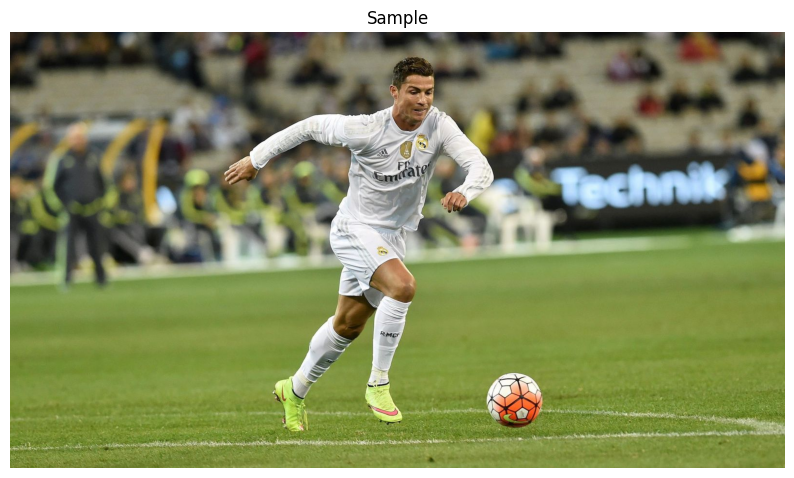

In [23]:
import matplotlib.pyplot as plt
from time import time
import mediapipe as mp
import cv2 as cv
import requests
import numpy as np
from io import BytesIO

mpPose = mp.solutions.pose

pose = mpPose.Pose(
    static_image_mode=True,
    min_detection_confidence=0.3,
    model_complexity=2
)

# Instead of directly using cv.imread with the URL, use requests to download the image
response = requests.get('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.ecestaticos.com%2Fimagestatic%2Fclipping%2F473%2F18e%2F47318ed9cb3f250d8a02269430c38e58%2Fcristiano-y-la-conversion-de-rafa-benitez-por-encima-de-mourinho.jpg%3Fmtime%3D1438259589&f=1&nofb=1&ipt=34a4e6a7dba63f624ae592fb62971acbd43f4be448666e4269f0837e74b79ed5&ipo=images')
image = np.array(bytearray(response.content), dtype=np.uint8) #convert to numpy array
image = cv.imdecode(image, cv.IMREAD_COLOR) #decode image

#Check if the image was loaded successfully
if image is not None:
    plt.figure(figsize=[10, 10])
    plt.title('Sample')
    plt.axis('off')
    plt.imshow(image[:, :, ::-1])
    plt.show()
else:
    print("Failed to load image from URL.")

In [24]:
result = pose.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

if result.pose_landmarks:
    for i in range(2):
        print(mpPose.PoseLandmark(i).name)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value])

NOSE
x: 0.535796046
y: 0.161077023
z: -0.29720217
visibility: 0.999998927

LEFT_EYE_INNER
x: 0.538833439
y: 0.141690135
z: -0.281333804
visibility: 0.99999547



In [25]:
imgHeight, imgWidth, _ = image.shape

In [26]:
if result.pose_landmarks:
    for i in range(2):
        print(mpPose.PoseLandmark(i).name)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].x * imgWidth)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].y * imgHeight)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].z * imgWidth)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].visibility)

NOSE
857.2736740112305
144.9693202972412
-475.5234718322754
0.999998927116394
LEFT_EYE_INNER
862.1335029602051
127.52112150192261
-450.1340866088867
0.9999954700469971


In [27]:
imgCopy = image.copy()

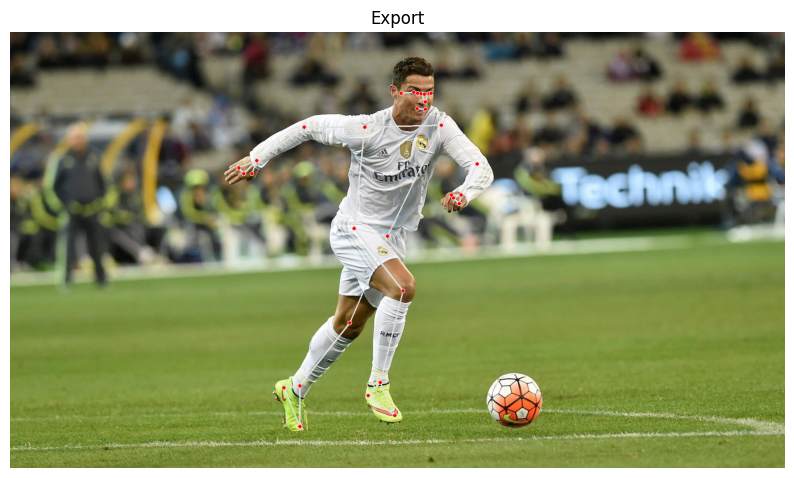

In [28]:
if result.pose_landmarks:
    mpDraw.draw_landmarks(
        image=imgCopy,
        landmark_list=result.pose_landmarks,
        connections=mpPose.POSE_CONNECTIONS
    )
    fig = plt.figure(figsize=[10, 10])
    plt.title('Export')
    plt.axis('off')
    plt.imshow(imgCopy[:, :, ::-1])
    plt.show()

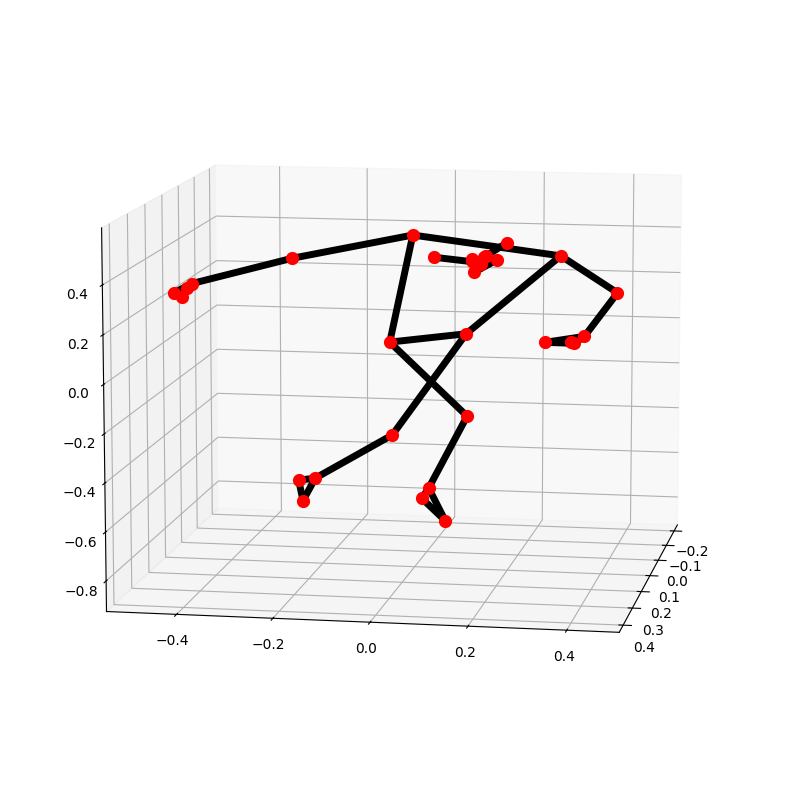

In [29]:
mpDraw = mp.solutions.drawing_utils

mpDraw.plot_landmarks(
    result.pose_world_landmarks,
    mpPose.POSE_CONNECTIONS
)

# Función de Implementación

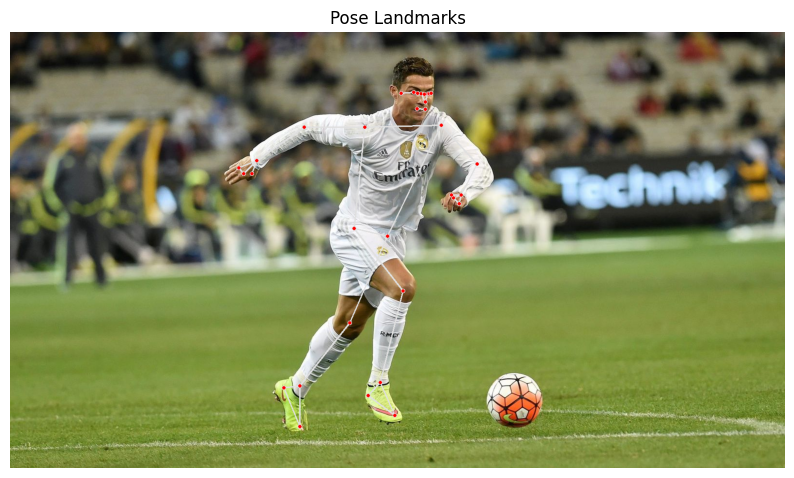

Landmarks:
Landmark 0: [857.2736740112305, 144.9693202972412, -475.5234718322754, 0.999998927116394]
Landmark 1: [862.1335029602051, 127.52112150192261, -450.1340866088867, 0.9999954700469971]
Landmark 2: [865.791130065918, 127.06227600574493, -450.5073070526123, 0.9999947547912598]
Landmark 3: [869.4253921508789, 126.85410976409912, -450.3896713256836, 0.9999964237213135]
Landmark 4: [848.0875968933105, 127.12860703468323, -467.7253246307373, 0.9999977350234985]
Landmark 5: [841.6604995727539, 126.38056576251984, -468.13526153564453, 0.9999977350234985]
Landmark 6: [833.0022811889648, 124.95974600315094, -468.2389736175537, 0.9999977350234985]
Landmark 7: [855.5047988891602, 128.66374254226685, -266.8194532394409, 0.999997615814209]
Landmark 8: [807.8441619873047, 126.26193165779114, -340.2015447616577, 0.9999948740005493]
Landmark 9: [857.7976226806641, 159.9494308233261, -398.58696460723877, 0.9999988079071045]
Landmark 10: [840.6875610351562, 158.4805727005005, -422.35193252563477,

In [32]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

mpPose = mp.solutions.pose
mpDraw = mp.solutions.drawing_utils

def process_image(image_url):
  """
  Processes an image from a URL to detect pose landmarks and visualize them.

  Args:
      image_url: The URL of the image to process.

  Returns:
      A tuple containing:
          - A NumPy array representing the image with pose landmarks drawn.
          - A list of landmark coordinates (x, y, z, visibility) for each landmark.
          - Or None if the image couldn't be loaded or processed.
  """
  try:
      response = requests.get(image_url)
      image = np.array(bytearray(response.content), dtype=np.uint8)
      image = cv2.imdecode(image, cv2.IMREAD_COLOR)

      if image is None:
          print("Failed to load image from URL.")
          return None, None

      with mpPose.Pose(
          static_image_mode=True,
          min_detection_confidence=0.3,
          model_complexity=2
      ) as pose:
          results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      img_height, img_width, _ = image.shape
      landmarks = []
      img_copy = image.copy()

      if results.pose_landmarks:
          mpDraw.draw_landmarks(
              image=img_copy,
              landmark_list=results.pose_landmarks,
              connections=mpPose.POSE_CONNECTIONS
          )

          for landmark in results.pose_landmarks.landmark:
              landmarks.append([
                  landmark.x * img_width,
                  landmark.y * img_height,
                  landmark.z * img_width,
                  landmark.visibility
              ])

      return img_copy, landmarks

  except Exception as e:
      print(f"An error occurred: {e}")
      return None, None


# Example usage (replace with your image URL)
image_url = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.ecestaticos.com%2Fimagestatic%2Fclipping%2F473%2F18e%2F47318ed9cb3f250d8a02269430c38e58%2Fcristiano-y-la-conversion-de-rafa-benitez-por-encima-de-mourinho.jpg%3Fmtime%3D1438259589&f=1&nofb=1&ipt=34a4e6a7dba63f624ae592fb62971acbd43f4be448666e4269f0837e74b79ed5&ipo=images'
annotated_image, landmarks = process_image(image_url)


if annotated_image is not None:
    plt.figure(figsize=[10, 10])
    plt.title('Pose Landmarks')
    plt.axis('off')
    plt.imshow(annotated_image[:, :, ::-1])  # Display the image
    plt.show()

    if landmarks:
      print("Landmarks:")
      for i, landmark in enumerate(landmarks):
          print(f"Landmark {i}: {landmark}")